In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import stats


hist_q1_1 = pd.read_csv('data-outputs/hist-q1-1.csv',  header = None)
hist_q1_2 = pd.read_csv('data-outputs/hist-q1-2.csv',  header = None)
hist_q1_3 = pd.read_csv('data-outputs/hist-q1-3.csv',  header = None)
hist_q1_4 = pd.read_csv('data-outputs/hist-q1-4.csv',  header = None)
hist_q1_5 = pd.read_csv('data-outputs/hist-q1-5.csv',  header = None)

hist_q2_1 = pd.read_csv('data-outputs/hist-q2-1.csv',  header = None)
hist_q2_2 = pd.read_csv('data-outputs/hist-q2-2.csv',  header = None)
hist_q2_3 = pd.read_csv('data-outputs/hist-q2-3.csv',  header = None)
hist_q2_4 = pd.read_csv('data-outputs/hist-q2-4.csv',  header = None)
hist_q2_5 = pd.read_csv('data-outputs/hist-q2-5.csv',  header = None)


data_q1 = pd.read_csv('data-outputs/q1-n-stats.csv')
data_q2 = pd.read_csv('data-outputs/q2-n-stats.csv')

N1 = data_q1.iloc[:,0]
mean1 = data_q1.iloc[:,1]
sigma1 = data_q1.iloc[:,2]

N2 = data_q2.iloc[:,0]
mean2 = data_q2.iloc[:,1]
sigma2 = data_q2.iloc[:,2]

plt.rc('font', family='serif')

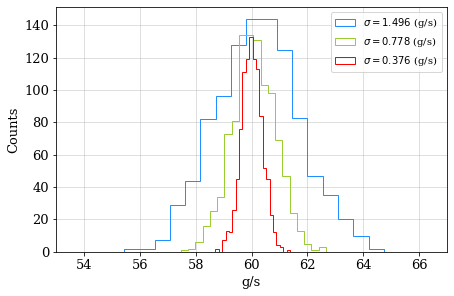

In [4]:
plt.figure(figsize = (7,4.5))

# plt.hist(hist_q2_1.iloc[0,:], histtype='step' , bins = 17, label = f'$ \sigma = {round(data_q1.iloc[:,2][0],3)}$')
plt.hist(hist_q2_2.iloc[0,:], histtype='step', bins = 17, label = f'$ \sigma = {round(data_q2.iloc[:,2][1],3)}$ (g/s)' , color = 'dodgerblue')
plt.hist(hist_q2_3.iloc[0,:], histtype='step', bins = 20, label = f'$ \sigma = {round(data_q2.iloc[:,2][2],3)}$ (g/s)', color = 'yellowgreen')
plt.hist(hist_q2_4.iloc[0,:], histtype='step', bins = 22, label = f'$ \sigma = {round(data_q2.iloc[:,2][3],3)}$ (g/s)' , color = 'r')
# plt.hist(hist_q2_5.iloc[0,:], histtype='step', bins = 21, label = f'$ \sigma = {round(data_q1.iloc[:,2][4],3)}$')

plt.xlabel('g/s', fontsize = 13); plt.ylabel('Counts', fontsize = 13)

plt.xlim(53,67)

plt.tick_params(labelsize = 13)

plt.grid(alpha = 0.5)
plt.legend()

plt.savefig('graficas/sigma-histogram-q2.pdf', bbox_inches='tight', dpi = 500)

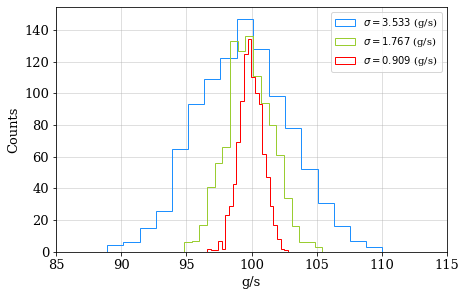

In [5]:
plt.figure(figsize = (7,4.5))

# plt.hist(hist_q1_1.iloc[0,:], histtype='step' , bins = 17, label = f'$ \sigma = {round(data_q1.iloc[:,2][0],3)}$')
plt.hist(hist_q1_2.iloc[0,:], histtype='step', bins = 17, label = f'$ \sigma = {round(data_q1.iloc[:,2][1],3)}$ (g/s)' , color = 'dodgerblue')
plt.hist(hist_q1_3.iloc[0,:], histtype='step', bins = 18, label = f'$ \sigma = {round(data_q1.iloc[:,2][2],3)}$ (g/s)', color = 'yellowgreen')
plt.hist(hist_q1_4.iloc[0,:], histtype='step', bins = 22, label = f'$ \sigma = {round(data_q1.iloc[:,2][3],3)}$ (g/s)' , color = 'r')
# plt.hist(hist_q1_5.iloc[0,:], histtype='step', bins = 21, label = f'$ \sigma = {round(data_q1.iloc[:,2][4],3)}$')


plt.xlabel('g/s', fontsize = 13); plt.ylabel('Counts', fontsize = 13)

plt.xlim(100-15 , 100+15)

plt.tick_params(labelsize = 13)

plt.grid(alpha = 0.5)
plt.legend()

plt.savefig('graficas/sigma-histogram-q1.pdf', bbox_inches='tight', dpi = 500)

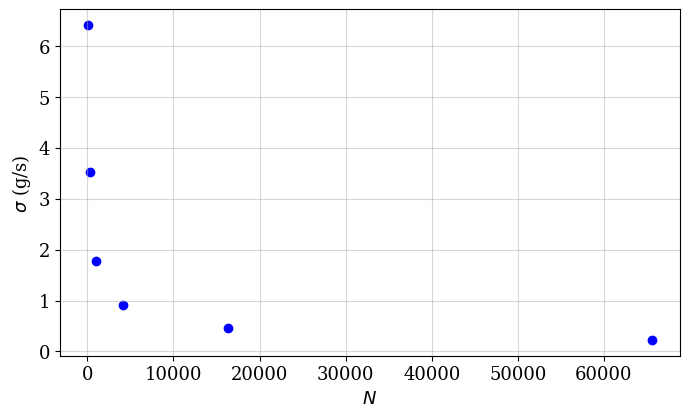

In [28]:
plt.figure(figsize = (8,4.5))

plt.scatter(N1, sigma1, color = 'b')

plt.xlabel('$N$', fontsize = 13); plt.ylabel('$\sigma$ (g/s)', fontsize = 13)

plt.grid(alpha= 0.5)

plt.tick_params(labelsize = 13)

plt.savefig('graficas/sigma-vs-n.pdf', bbox_inches='tight', dpi = 500)

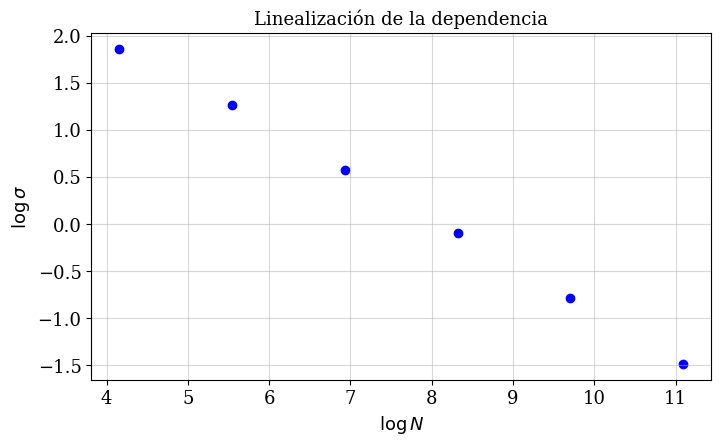

In [29]:
plt.figure(figsize = (8,4.5))

plt.scatter(np.log(N1) , np.log(sigma1) , color = 'b')

plt.title('Linealización de la dependencia', fontsize = 13); plt.xlabel('$\log{N}$', fontsize = 13); plt.ylabel('$\log{\sigma}$', fontsize = 13)

plt.tick_params(labelsize = 13)

plt.grid(alpha= 0.5)

-0.4848166603447202 3.9172199980650726


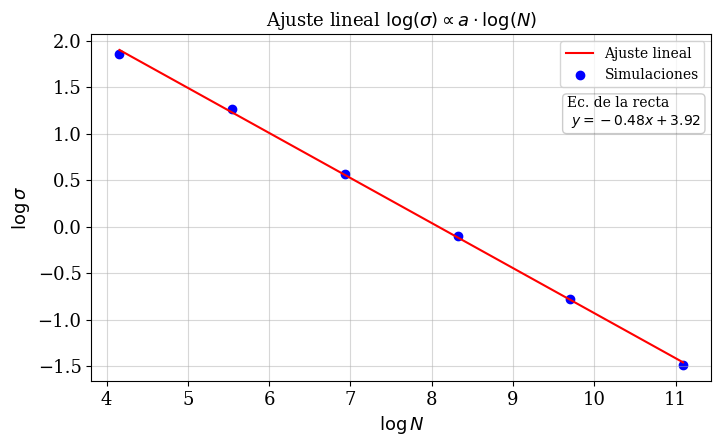

In [30]:
x = np.log(N1)
y = np.log(sigma1)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

X = np.linspace(min(np.log(N1)) , max(np.log(N1)), 1000)
Y = slope*X + intercept

plt.figure(figsize = (8,4.5))

plt.plot(X,Y, color = 'r', label = 'Ajuste lineal')
plt.scatter(np.log(N1) , np.log(sigma1) , color = 'b' , label = 'Simulaciones')

plt.text(9.66, 1.1, f'Ec. de la recta \n $y = {round(slope,2)}x + {round(intercept,2)}  $', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))


plt.title('Ajuste lineal $\log(\sigma) \propto a \cdot \log(N)$', fontsize = 13); plt.xlabel('$\log{N}$', fontsize = 13); plt.ylabel('$\log{\sigma}$', fontsize = 13)

plt.grid(alpha= 0.5)
plt.legend()

plt.tick_params(labelsize = 13)

print(slope, intercept)
plt.savefig('graficas/ajuste-logsigma-logN.pdf', bbox_inches='tight', dpi = 500)

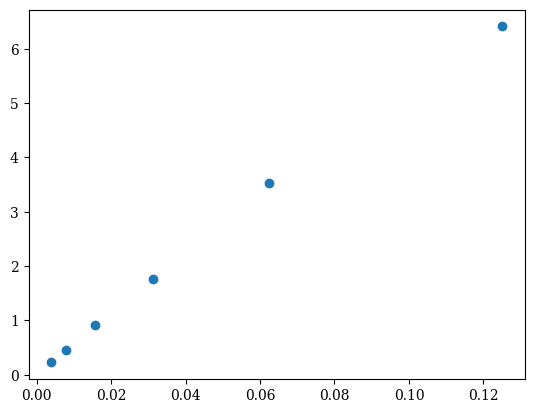

In [31]:
plt.scatter( 1/(np.sqrt(N1)) , sigma1  )

51.26224142482687 0.11433566348280211


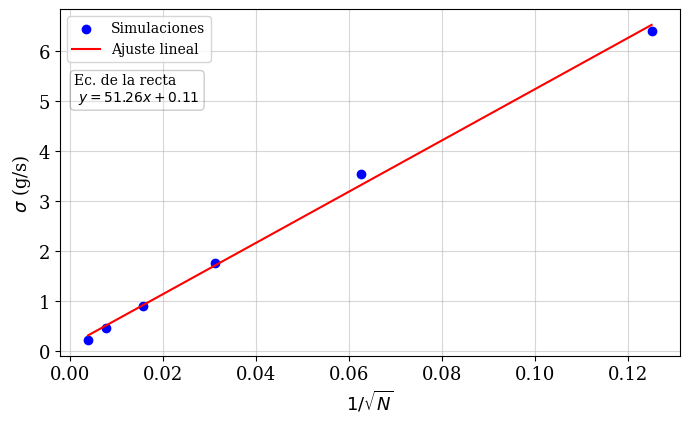

In [32]:
x = 1/(np.sqrt(N1))
y = sigma1

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

X = np.linspace( min(1/(np.sqrt(N1))), max(1/(np.sqrt(N1))), 1000)
Y = slope*X + intercept


plt.figure(figsize = (8,4.5))

plt.scatter( 1/(np.sqrt(N1)) , sigma1  , color = 'b', label = 'Simulaciones')
plt.plot(X,Y, color = 'r' , label= 'Ajuste lineal')
plt.text( 0.0010, 5, f'Ec. de la recta \n $y = {round(slope,2)}x + {round(intercept,2)}  $', bbox=dict(boxstyle='round', facecolor='white', alpha=0.2))

plt.xlabel('$1/\sqrt{N}$', fontsize = 13); plt.ylabel('$\sigma$ (g/s)', fontsize = 13)

plt.grid(alpha= 0.5)
plt.legend()

plt.tick_params(labelsize = 13)

print(slope, intercept)
plt.savefig('graficas/ajuste-sigma-sqrtN.pdf', bbox_inches='tight', dpi = 500)

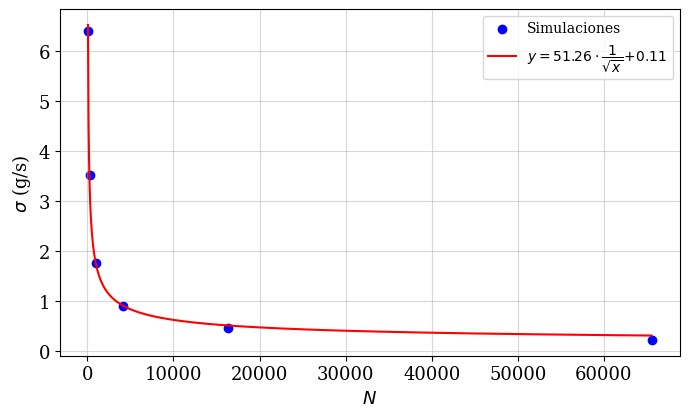

In [33]:
X = np.linspace( min(N1) , max(N1), 1000)
Y = slope*(1/np.sqrt(X)) + intercept

plt.figure(figsize = (8,4.5))

plt.scatter(N1 , sigma1 , color = 'b' , label = 'Simulaciones')
plt.plot(X,Y, color = 'r', label = f'$y = {round(slope,2)} \cdot$' + '$\dfrac{1}{\sqrt{x}}$' + f'$+{round(intercept,2)}$' )

plt.xlabel('$N$', fontsize = 13); plt.ylabel('$\sigma$ (g/s)', fontsize = 13)

plt.tick_params(labelsize = 13)

plt.grid(alpha= 0.5)
plt.legend()
plt.savefig('graficas/ajuste-sigma-vs-n.pdf', bbox_inches='tight', dpi = 500)

In [34]:
import math

def normal_cdf(x, mean, sd):
    """
    Función que calcula la probabilidad acumulada de una variable aleatoria normal
    con media 'mean' y desviación estándar 'sd', evaluada en 'x'
    """
    z = (x - mean) / sd
    return (1.0 + math.erf(z / math.sqrt(2.0))) / 2.0

def area_bajo_curva_normal(lower, upper, mean, sd):
    """
    Función que calcula el área bajo la curva de una distribución normal con media 'mean'
    y desviación estándar 'sd' en el rango especificado por 'lower' y 'upper'
    """
    return normal_cdf(upper, mean, sd) - normal_cdf(lower, mean, sd)

In [35]:
probs = [9.18, 0.84, 0.16, 0.031]

v = [100, 80, 90, 92]
delta = 2

result = 1

for i in v:
    result *= area_bajo_curva_normal( i - delta, i + delta , 90, 8)


result*100

0.03188588862381266